# ---------------------------- Reddit Post Classifier ----------------------------

In this interactive python notebook, we will be exploring the dataset of top posts on reddit related to popular reddit communities - Machine Learning, Artificial Intelligence, and Data Science. Another dataset includes all comments on those posts. 

The target is to predict the subreddit category given the comment on a post. Let's jump right into it.

In [85]:
## import required libraries
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravirajpurohit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ravirajpurohit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## ------------------------------ Data Exploration ------------------------------

In [26]:
dataset = pd.read_csv('data/Top_Posts.csv').drop(columns=['post_url','date-time'])
dataset.head()

,post_id,post_title,subreddit,flair_text,score,comments,upvote_ratio,year
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,Project,7798,186,0.99,2020
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,Discussion,5851,133,0.98,2021
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,Research,4761,111,0.97,2020
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,News,4688,230,0.97,2021
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,Discussion,4568,228,0.96,2021


In [15]:
## check how many items in each class
dataset.subreddit.value_counts()

artificial         999
MachineLearning    998
datascience        990
Name: subreddit, dtype: int64

In [12]:
## check each column's information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_id       2987 non-null   object 
 1   post_title    2987 non-null   object 
 2   subreddit     2987 non-null   object 
 3   post_url      2987 non-null   object 
 4   flair_text    2441 non-null   object 
 5   score         2987 non-null   int64  
 6   comments      2987 non-null   int64  
 7   upvote_ratio  2987 non-null   float64
 8   date-time     2987 non-null   object 
 9   year          2987 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 233.5+ KB


In [25]:
## check each colummn's description
dataset.describe()

,score,comments,upvote_ratio,year
count,2987.000000,2987.000000,2987.000000,2987.000000
mean,480.092400,72.939739,0.950683,2020.276197
std,519.716958,92.253969,0.039040,1.783035
min,78.000000,0.000000,0.660000,2013.000000
25%,183.000000,19.000000,0.940000,2019.000000
50%,360.000000,45.000000,0.960000,2020.000000
75%,542.500000,99.500000,0.980000,2022.000000
max,7798.000000,2361.000000,1.000000,2023.000000


<AxesSubplot:>

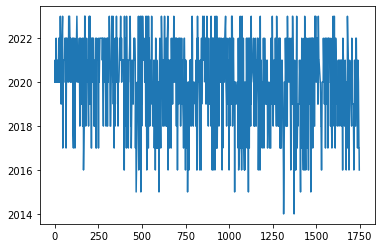

In [17]:
## Checkout year feature with each class to see if there is a pattern
dataset[dataset.subreddit=='MachineLearning'].year.plot()

<AxesSubplot:>

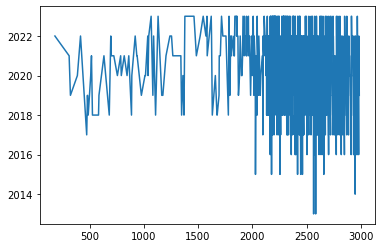

In [18]:
dataset[dataset.subreddit=='artificial'].year.plot()

<AxesSubplot:>

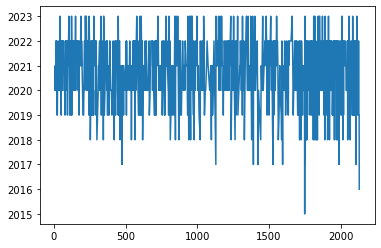

In [19]:
dataset[dataset.subreddit=='datascience'].year.plot()

In [52]:
## import another dataset containing comments for each post
dataset_add = pd.read_csv('data/Top_Posts_Comments.csv')
dataset_add.head()

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...


In [59]:
## add comments to the main dataset and merge the two
dataset = dataset.merge(right=dataset_add.groupby(by='post_id', as_index=False).agg(list),
                        how='inner', 
                        on='post_id')

In [60]:
dataset.head()

,post_id,post_title,subreddit,flair_text,score,comments,upvote_ratio,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,Project,7798,186,0.99,2020,[Twitter thread: [https://twitter.com/cyrildia...
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,Discussion,5851,133,0.98,2021,[The fact that they also had to know the locat...
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,Research,4761,111,0.97,2020,"[I cant stop watching the actress, it’s like s..."
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,News,4688,230,0.97,2021,[This seems like the next museum gimmick where...
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,Discussion,4568,228,0.96,2021,"[Voting takes forever. What exactly are they ""..."


In [74]:
## check if the post title contains title character everywhere
[i.split(']')[0] for i in dataset.iloc[0:,1].values]

['[Project',
 '[D',
 '[R',
 '[N',
 '[D',
 '[D',
 'data siens',
 'I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P',
 'The pain and excitement',
 '[D',
 '[Project',
 'Shout Out to All the Mediocre Data Scientists Out There',
 "Let's keep this on...",
 '[P',
 'Guys, we’ve been doing it wrong this whole time',
 'It’s never too early',
 '[D',
 'how about that data integrity yo',
 'Didn’t have to chart this one 🔥',
 '[P',
 'Wait until you see the data in hospitals...',
 'Imposter Syndrome is a problem for me and I think this is the main contributor',
 '[R',
 'DS at a glance',
 '[R',
 'Remember it always.',
 '[P',
 '[P',
 '[R',
 '[R',
 'I created a four-page Data Science Cheatsheet to assist with exam reviews, interview prep, and anything in-between',
 '[P',
 '[P',
 'I want to be free of this pain.',
 'True that',
 '[D',
 '[D',
 'A little seasonal homage... [P',
 '[D',
 'Selling my own damn data (cartoon by artist Jeremy Nguyen)',
 'Graph of gra

In [78]:
'hello'+' '.join(['hello I am here','hi You are there','what can i do'])

'hellohello I am here hi You are there what can i do'

In [82]:
dataset.head(19)

,post_id,post_title,subreddit,flair_text,score,comments,upvote_ratio,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,Project,7798,186,0.99,2020,[Twitter thread: [https://twitter.com/cyrildia...
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,Discussion,5851,133,0.98,2021,[The fact that they also had to know the locat...
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,Research,4761,111,0.97,2020,"[I cant stop watching the actress, it’s like s..."
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,News,4688,230,0.97,2021,[This seems like the next museum gimmick where...
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,Discussion,4568,228,0.96,2021,"[Voting takes forever. What exactly are they ""..."
5,n2f0ld,[D] Types of Machine Learning Papers,MachineLearning,Discussion,4370,219,0.98,2021,[Everyone trying to squeeze out final drops fr...
6,k8nyf8,data siens,datascience,Fun/Trivia,3954,75,0.97,2020,[I was once reading this article that went as:...
7,vkxsf2,I made a robot that punishes me if it detects ...,MachineLearning,Project,3876,161,0.95,2022,[Give it your credit card and have it donate e...
8,oeg6nl,The pain and excitement,datascience,Fun/Trivia,3802,177,0.97,2021,"[Upper management doesn't care., real pros jus..."
9,hiv3vf,[D] The machine learning community has a toxic...,MachineLearning,Discussion,3787,569,0.95,2020,"[>Thirdly, there is a worshiping problem.\n\nT..."


In [99]:
data = dataset.copy()
data['comment'] = data.apply(lambda row: row['post_title']+' '+' '.join(np.array(row['comment']).astype(str)), axis=1)
data.drop(columns=['post_title'], inplace=True)

In [100]:
data

,post_id,subreddit,flair_text,score,comments,upvote_ratio,year,comment
0,gh1dj9,MachineLearning,Project,7798,186,0.99,2020,[Project] From books to presentations in 10s w...
1,kuc6tz,MachineLearning,Discussion,5851,133,0.98,2021,[D] A Demo from 1993 of 32-year-old Yann LeCun...
2,g7nfvb,MachineLearning,Research,4761,111,0.97,2020,[R] First Order Motion Model applied to animat...
3,lui92h,MachineLearning,News,4688,230,0.97,2021,[N] AI can turn old photos into moving Images ...
4,ohxnts,MachineLearning,Discussion,4568,228,0.96,2021,[D] This AI reveals how much time politicians ...
...,...,...,...,...,...,...,...,...
2977,slx33m,artificial,Discussion,84,6,0.90,2022,We live in beautiful times where you can learn...
2978,k9otbj,artificial,News,78,1,0.97,2020,Yann LeCun’s Deep Learning Course Free From NY...
2979,k2orib,artificial,Self Promotion,80,2,0.95,2020,You Can Now Learn for FREE: 9 Courses by Googl...
2980,ex9w4w,artificial,news,80,10,0.97,2020,"Chatbot trained on ""public domain social media..."


In [104]:
data.subreddit.value_counts()

MachineLearning    998
artificial         994
datascience        990
Name: subreddit, dtype: int64

## --------------------------- Data Preprocessing ---------------------------

In [133]:
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    """
    steps like -
    converts all characters to lower
    splits sentence to words
    removes non-alphabetical words
    
    Parameters
    ----------
    text - string

    Returns
    -------
    text - string (preprocessed)
    """
    text = text.lower()
    text = text.replace('"','').replace('\n','').strip()
    ## word_tokenize splits a sentence into words linguistically
    text = nltk.word_tokenize(text)
    text = [word for word in text if (word.isalpha() and word not in stopwords.words('english'))]
    
    word_list = [lemmatizer.lemmatize(word) for word in text]
    
    return ' '.join(word_list)

In [134]:
data['comment'].apply(preprocess)

0       project book presentation ar ml twitter thread...
1       demo yann lecun showing world first convolutio...
2       r first order motion model applied animate pai...
3       n ai turn old photo moving image link given co...
4       ai reveals much time politician stare phone wo...
                              ...                        
2977    live beautiful time learn machine learning ai ...
2978    yann lecun deep learning course free nyu link ...
2979    learn free course google artificial intelligen...
2980    chatbot trained public domain social medium co...
2981    tesla neural net identify red green traffic li...
Name: comment, Length: 2982, dtype: object

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [106]:
data.subreddit.factorize()

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['MachineLearning', 'datascience', 'artificial'], dtype='object'))

In [113]:
X = data.comment
y = data.subreddit.factorize()[0]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [116]:
X_train.shape, y_train.shape

((2385,), (2385,))

In [117]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [125]:
y_pred = text_clf.predict_proba(X_test)


In [126]:
y_pred

array([[2.59602851e-01, 7.15477328e-01, 2.49198216e-02],
       [3.02122907e-01, 6.66037716e-01, 3.18393772e-02],
       [4.70613169e-01, 4.61324087e-01, 6.80627445e-02],
       ...,
       [1.41873618e-02, 9.85583219e-01, 2.29418940e-04],
       [4.20285950e-01, 5.31583208e-01, 4.81308421e-02],
       [1.94829176e-01, 7.69846520e-01, 3.53243039e-02]])

In [119]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.5728643216080402
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.72      0.59       199
           1       0.63      0.94      0.76       206
           2       1.00      0.03      0.05       192

    accuracy                           0.57       597
   macro avg       0.71      0.56      0.47       597
weighted avg       0.71      0.57      0.47       597

